# Plotting the Housing Data

A good first step when working with any new data set is to do some exploratory data analysis, starting with a plots of the data. Let's download the data. There is some information about the [data set](https://archive.ics.uci.edu/ml/datasets/Housing) at the UCI ML repository. It's a good idea to take a look at the dataset description before proceeding.

In [2]:
%matplotlib inline

# Download the data, save to a file called "housing.data"
import urllib
#.data format gives you cool labeling abilities - can call things using different methods
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
urllib.urlretrieve (data_url, "housing.data")

('housing.data', <httplib.HTTPMessage instance at 0x11233ce18>)

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for convenience.

In [3]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

## Loading the Data

Now let's use pandas to load the data into a data frame. Note that the data is space separated (rather than the more common comma separated data). Here are the first few lines:

```
0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
```

In [7]:
import pandas as pd

data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

# Take a look at the first few rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Knowledge Check:

How many rows are in the dataset?

In [5]:
# Compute the number of rows
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null object
ZN         0 non-null float64
INDUS      0 non-null float64
CHAS       0 non-null float64
NOX        0 non-null float64
RM         0 non-null float64
AGE        0 non-null float64
DIS        0 non-null float64
RAD        0 non-null float64
TAX        0 non-null float64
PTRATIO    0 non-null float64
B          0 non-null float64
LSTAT      0 non-null float64
MEDV       0 non-null float64
dtypes: float64(13), object(1)
memory usage: 55.4+ KB


## Plotting the Data

We are interested in the house values, given in column "MEDV" as a target for modeling. By plotting each of the other columns against "MEDV" we can get a sense of which variables may be correlated.

There are many ways we can plot the data, using `pandas`, `matplotlib`, or `seaborn`. In any case, it's nice to import `seaborn` for the improved styling. Let's try using `pandas` first to make a scatter plot of crime (column "CRIM") versus house value ("MEDV").

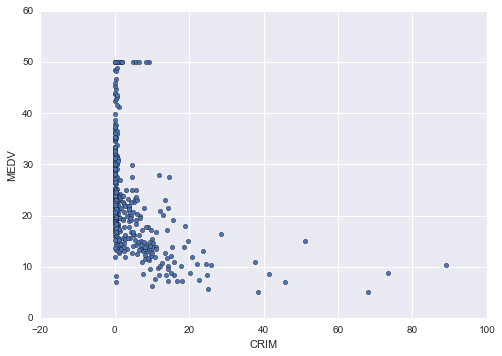

In [8]:
import seaborn as sns

# Plot using pandas
data.plot.scatter(x='CRIM', y='MEDV')
#Pearson coefficient = between 1(perfectly positive) and -1(perfectly negative)
#r-value of 0 is no relationship at all - just stuff plotted all over

It looks like there is a relationship. While houses in low crime areas can have a wide range of values, houses in high crime areas appear to have lower values.

Knowledge checks:
* How do we select a column of data from a pandas DataFrame?
* Let's make the same plot with matplotlib.

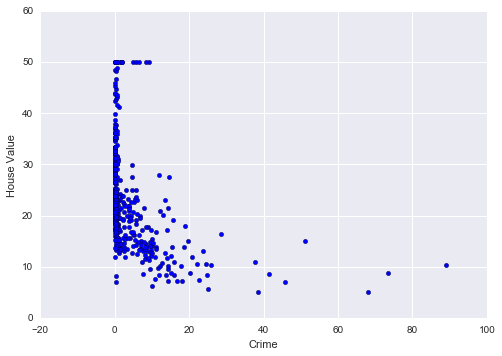

In [9]:
# Knowledge Check Solution
from matplotlib import pyplot as plt

# Plot using matplotlib
plt.scatter(data["CRIM"], data["MEDV"])
plt.xlabel("Crime")
plt.ylabel("House Value")

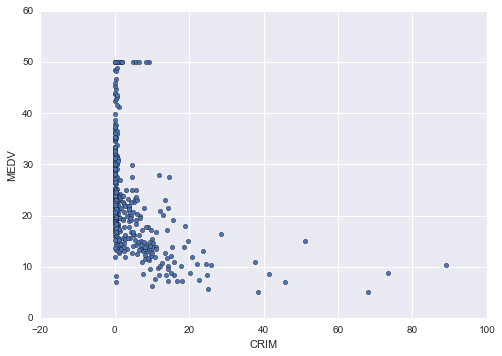

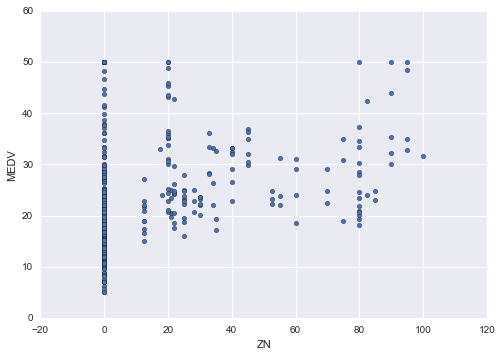

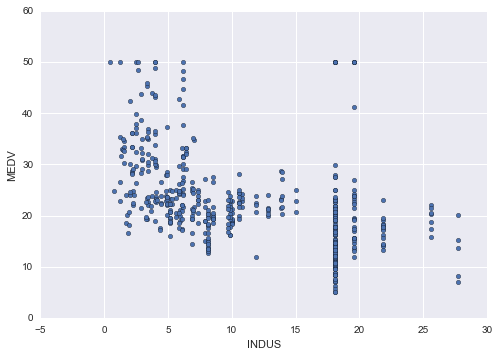

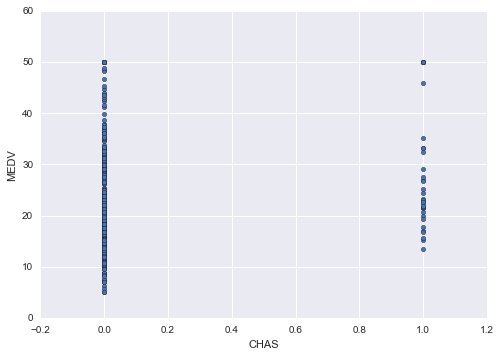

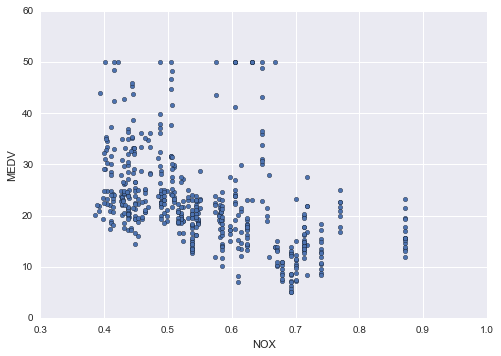

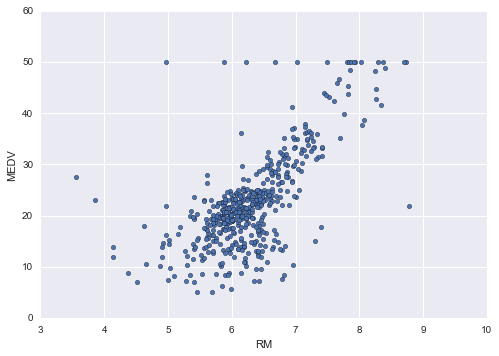

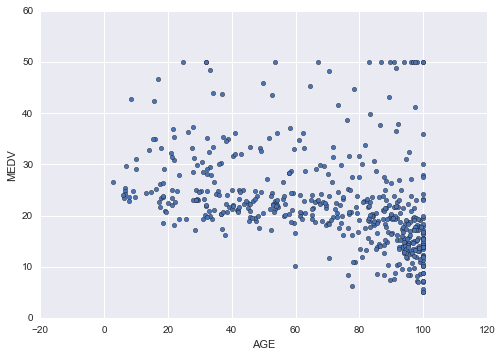

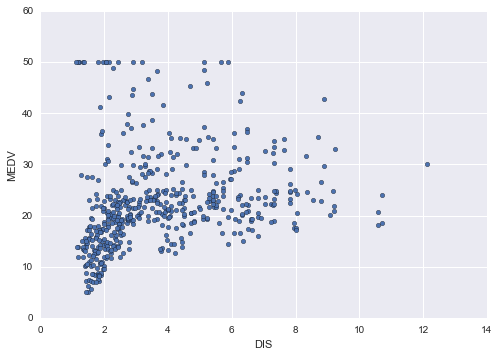

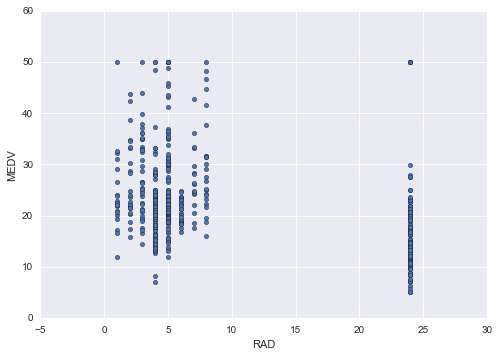

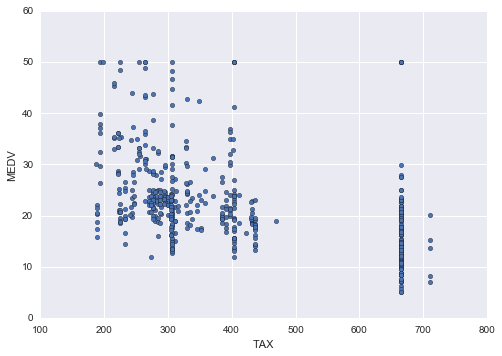

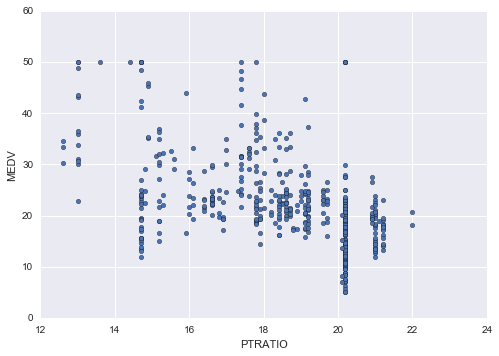

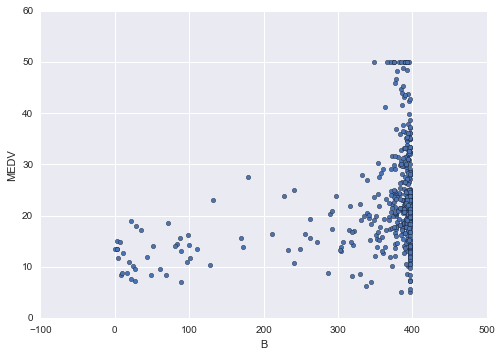

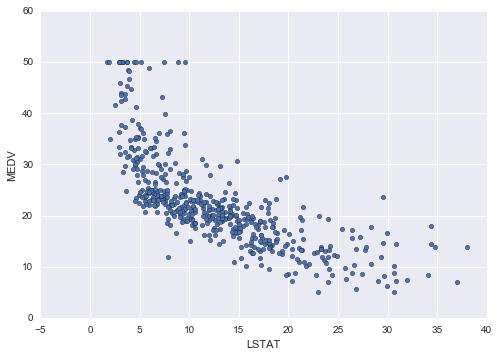

In [11]:
#Earlier, a list was created called names = [] and it contained each column header/name.
#Simple for-loop iterates through each item in that list, creating a scatter plot for each column against MEDV

for name in names:
    if name != 'MEDV':
        data.plot.scatter(name, 'MEDV')
    

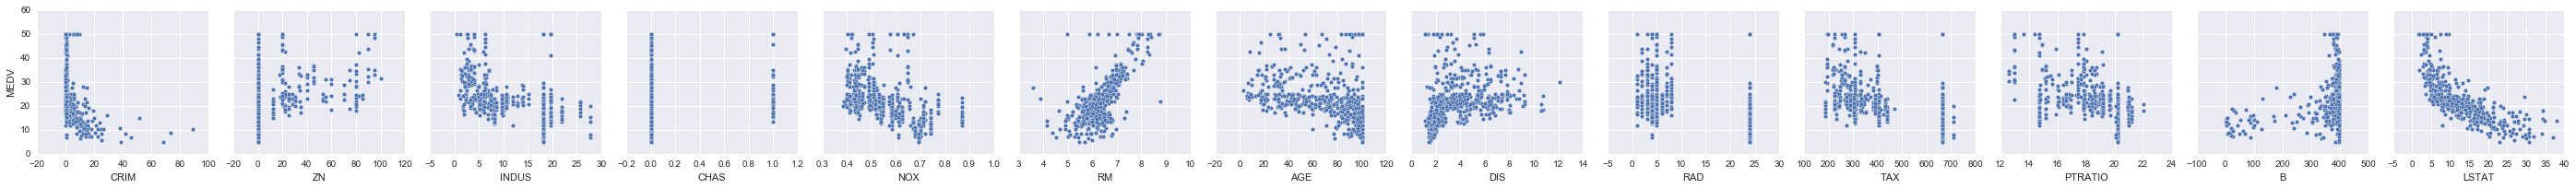

In [13]:
sns.pairplot(x_vars=names[:-1], y_vars=['MEDV'], data=data, size=3)

### Exercises

Exercise 1: Using `pandas` or `matplotlib` plot the remaining variables against "MEDV" and discuss the relationships you find. Question: Which variables seem to correlate well?

### Bonus Exercises

Exercise 2: Seaborn is very handy for making plots of data for exploratory purposes. Try using `seaborn`'s [pairplots](https://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html) to make similar plots.

Exercise 3: Improve your plots by including units and better axis labels. You'll need to read the [data set description](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

Exercise 4: Can you find any visual correlations between two variables other than MEDV?